The E-commerce Clothes company based in New York wants to know whether it should concentrate more on the Mobile App or Website to enhance customer experience

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("dataset/ecommerce-customers.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<AxesSubplot:>

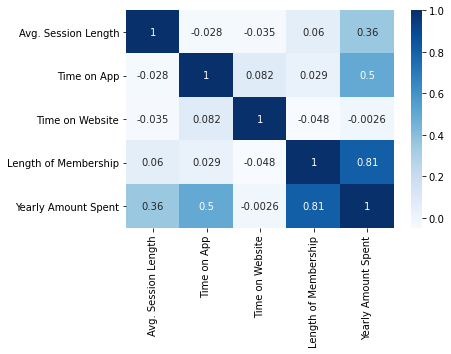

In [4]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

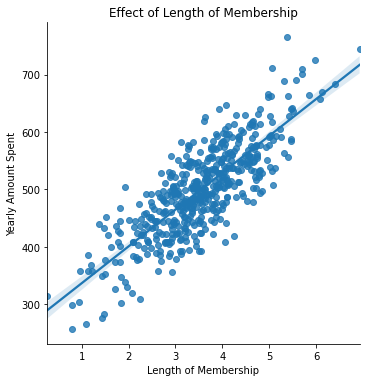

In [5]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data).set(title="Effect of Length of Membership");

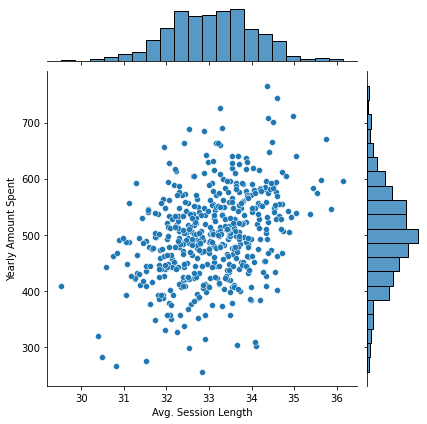

In [6]:
sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent', data=data);

In [7]:
from sklearn.model_selection import train_test_split
data.drop(["Email", "Address", "Avatar"], axis=1, inplace=True)
x = data.drop('Yearly Amount Spent', axis=1)
y = data['Yearly Amount Spent'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

In [9]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 9.935076301595673


In [10]:
pd.DataFrame(lm.coef_, x.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,26.341787
Time on App,38.791590
Time on Website,0.058626
Length of Membership,61.203417


In [11]:
lm.score(x,y)

0.9842077742902191

### <div style="text-align: right"> Developed by Mr. Ronik Dedhia</div>